# Group Members
- **Vladislav Pavlyuk**: 332294891
- **Ronen Shershnev**: 322217175

---

# Project Overview

This notebook demonstrates basic Machine Learning concepts using **Linear Regression**.

The **"House Prices: Advanced Regression Techniques"** competition challenges us to predict the final sale prices of residential homes in Ames, Iowa, using a rich dataset.

This competition serves as an excellent platform for:
- Practicing advanced regression techniques.
- Exploring feature engineering.
- Implementing machine learning algorithms, such as **Gradient Boosting**.

It’s particularly beneficial for anyone looking to enhance their skills in **predictive modeling** and **data analysis**.

# Introduction to the Workflow

In this project, our goal is to predict house prices based on a comprehensive dataset provided in the "House Prices: Advanced Regression Techniques" competition. Our workflow follows a structured approach to ensure accurate predictions and effective model evaluation:

## 1. Data Exploration and Cleaning
- We began by exploring the dataset to understand the structure, identify missing values.
- Missing data was addressed using statistical imputation techniques, such as filling numerical features with the mean and categorical features with the mode.

## 2. Feature Engineering
- Carefully selected the top features most correlated with the target variable, Label, using correlation analysis.

## 3. Data Normalization
- All numerical features were normalized using `StandardScaler` to ensure that features were on the same scale, an important step for gradient-based machine learning models.

## 4. Visualization
- Exploratory visualizations, such as histograms, scatter plots, and heatmaps, were employed to understand relationships between features and Label.
- These insights guided feature selection and modeling.

## 5. Modeling and Evaluation
- Experimented with several models, including `LinearRegression`, `SGDRegressor`, and ensemble methods like Gradient Boosting, to find the best-performing algorithm.
- Evaluated model performance using metrics like **R²**, **MSE**, and **RMSE**, ensuring good generalization on unseen data.

By following this step-by-step workflow, We aim to build a robust predictive model capable of accurately estimating house prices.

In [581]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

from attr import dataclass
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

In [582]:
%matplotlib inline

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

## 1. Data Exploration and Cleaning

In [583]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

We noticed some missing values

In [584]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [585]:
print(data.isna().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [586]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


We removed the ID column as it is unnecessary

In [588]:
data = data.drop('Id', axis=1)

In [589]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [590]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In the code bellow we started to fill and clean the missing data e.g. for numerical features we filled the gap with the mean and for categorical features we replaced them with mode function


In [591]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data.drop(['Alley'], axis=1, inplace=True)
data.drop(['GarageYrBlt'],axis=1,inplace=True)
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

We rechecked the data after all manipulation and as we can see in the next table


In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Now we turned all the object features into numerical features

In [593]:
# Extract the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialize the OneHotEncoder with drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Perform one-hot encoding
encoded_data = pd.DataFrame(
    encoder.fit_transform(data[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Drop the original categorical columns and concatenate the encoded data
data = pd.concat([data.drop(columns=categorical_columns), encoded_data], axis=1)

We wanted to check the updated data
As you can see all categorical features were converted correctly

In [594]:
# Verify the updated dataset
print(data.head(3))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          2003       196.0         706           0  ...             0.0   
1          1976         0.0         978           0  ...             0.0   
2          2002       162.0         486           0  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0          1.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0 

We wanted to check which features were the most involve in the final decision

In [595]:
correlation_matrix = data.corr()

# Calculate correlation of each feature with SalePrice
correlation_with_price = correlation_matrix['SalePrice']

# Get the top 50 features most correlated with SalePrice (including SalePrice itself)
top_features = correlation_with_price.abs().nlargest(80)

# Convert to DataFrame and reset the index to include feature names as a column
top_features_df = top_features.reset_index()

# Rename the columns for clarity
top_features_df.columns = ['Feature', 'Correlation with SalePrice']

# Print the DataFrame with indices
print(top_features_df)



                 Feature  Correlation with SalePrice
0              SalePrice                    1.000000
1            OverallQual                    0.790982
2              GrLivArea                    0.708624
3             GarageCars                    0.640409
4             GarageArea                    0.623431
..                   ...                         ...
75  Neighborhood_Somerst                    0.140058
76          ExterCond_Fa                    0.137914
77         GarageCond_TA                    0.135986
78          KitchenAbvGr                    0.135907
79      BsmtFinType1_Rec                    0.135667

[80 rows x 2 columns]


As we saw in the table above that after the 50 feature the correlation is lower that 0.25
So the feature is un....

Correlation Strength Thresholds:

	•	Very Strong Correlation:  |r| > 0.80
	•	Strong Correlation:  0.60 < |r| < 0.80
	•	Moderate Correlation:  0.40 < |r| < 0.60
	•	Weak Correlation:  0.20 < |r| < 0.40
	•	Very Weak/No Correlation:  |r| < 0.20

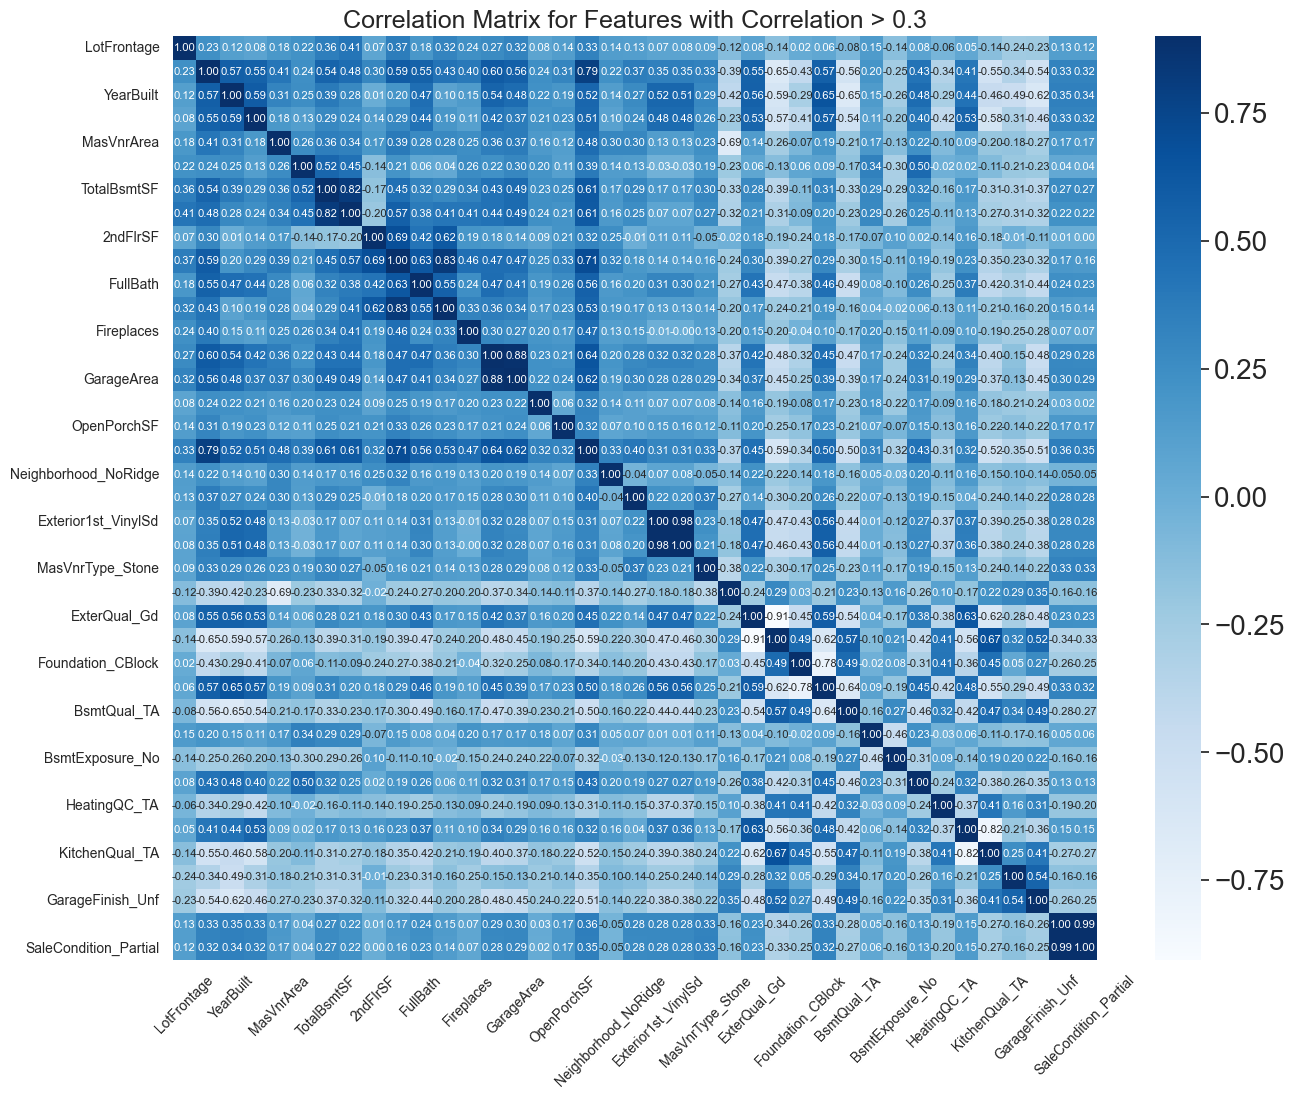

Features with correlation > 0.3 with SalePrice:
LotFrontage              0.334901
OverallQual              0.790982
YearBuilt                0.522897
YearRemodAdd             0.507101
MasVnrArea               0.475241
BsmtFinSF1               0.386420
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
2ndFlrSF                 0.319334
GrLivArea                0.708624
FullBath                 0.560664
TotRmsAbvGrd             0.533723
Fireplaces               0.466929
GarageCars               0.640409
GarageArea               0.623431
WoodDeckSF               0.324413
OpenPorchSF              0.315856
SalePrice                1.000000
Neighborhood_NoRidge     0.330424
Neighborhood_NridgHt     0.402149
Exterior1st_VinylSd      0.305009
Exterior2nd_VinylSd      0.306389
MasVnrType_Stone         0.330476
MasVnrType_nan          -0.367456
ExterQual_Gd             0.452466
ExterQual_TA            -0.589044
Foundation_CBlock       -0.343263
Foundation_PConc         0.497734


In [596]:
# Select features with correlation > 0.3 with SalePrice
correlation_with_price = correlation_matrix['SalePrice']
selected_features = correlation_with_price[correlation_with_price.abs() > 0.3].index  # Filter features

# Create a correlation matrix for the selected features
selected_features_corr_matrix = data[selected_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 12))  # Adjust figure size for readability
sns.heatmap(
    selected_features_corr_matrix,
    vmax=0.9,  # Maximum correlation value for the color scale
    cmap="Blues",
    square=True,
    annot=True,  # Annotate the cells with correlation values
    fmt=".2f",  # Format for correlation values
    annot_kws={"size": 8}  # Font size for annotations
)
plt.title("Correlation Matrix for Features with Correlation > 0.3", fontsize=18)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

# Step 5: Print the selected features and their correlation with SalePrice
print("Features with correlation > 0.3 with SalePrice:")
print(correlation_with_price[correlation_with_price.abs() > 0.3])

Here we wanted to see all the data visualized

In [597]:
if 'SalePrice' not in selected_features:
    selected_features = selected_features.append(pd.Index(['SalePrice']))

data_with_top_features = data[selected_features]

# Display the first few rows
print(data_with_top_features.head())

   LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0            7       2003          2003       196.0         706   
1         80.0            6       1976          1976         0.0         978   
2         68.0            7       2001          2002       162.0         486   
3         60.0            7       1915          1970         0.0         216   
4         84.0            8       2000          2000       350.0         655   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  BsmtExposure_Gd  \
0          856       856       854       1710  ...              0.0   
1         1262      1262         0       1262  ...              1.0   
2          920       920       866       1786  ...              0.0   
3          756       961       756       1717  ...              0.0   
4         1145      1145      1053       2198  ...              0.0   

   BsmtExposure_No  BsmtFinType1_GLQ  HeatingQC_TA  KitchenQual_Gd  \
0              1.0    

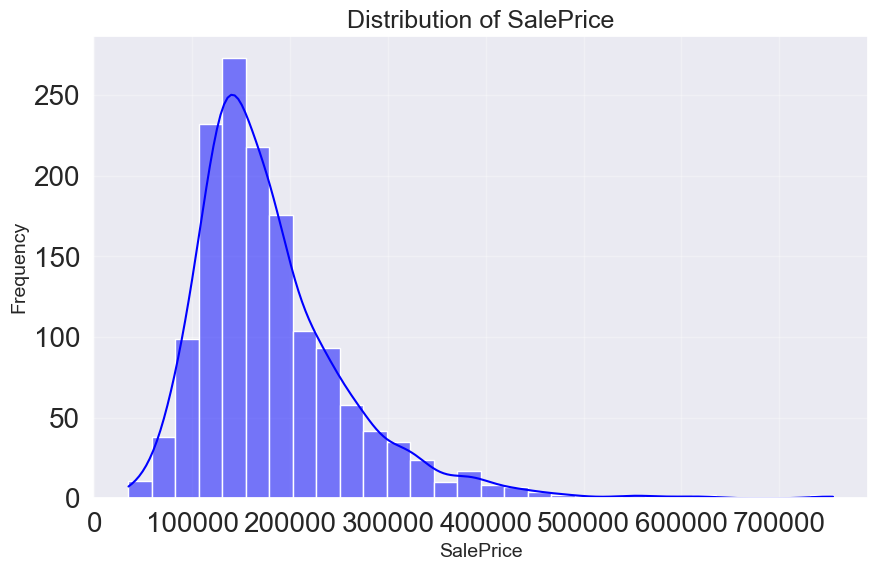

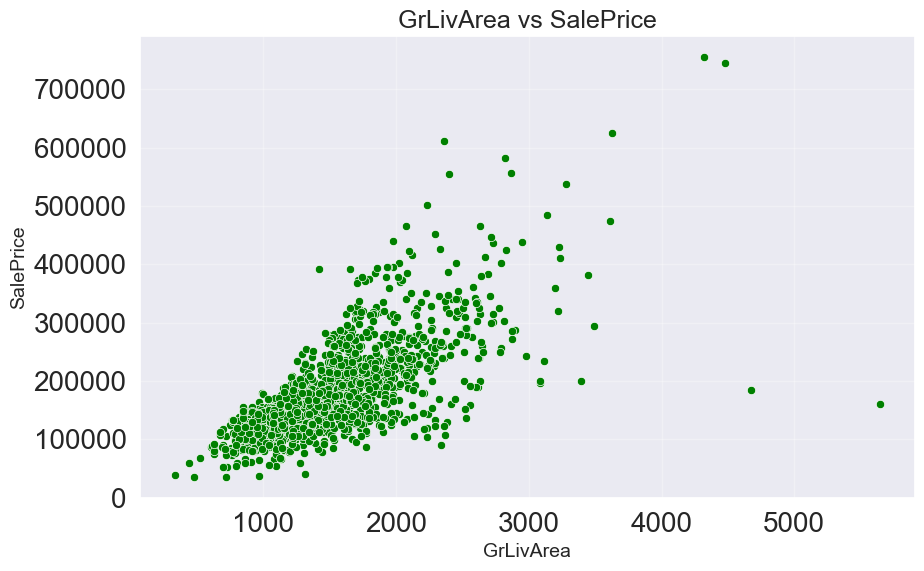

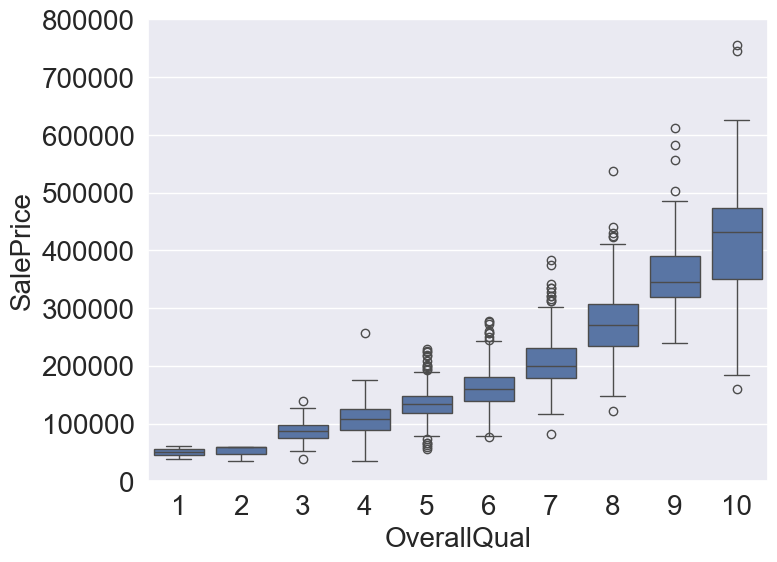

In [598]:
# Visualization 1: Distribution plot of 'Frequency' && 'SalePrice'

plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of SalePrice', fontsize=18)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Visualization 2: Scatter plot of 'GrLivArea' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_with_top_features['GrLivArea'], y=data_with_top_features['SalePrice'], color='green')
plt.title('GrLivArea vs SalePrice', fontsize=18)
plt.xlabel('GrLivArea', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Visualization 3: Boxplot of 'OverallQual' vs 'SalePrice'
data = pd.concat([data_with_top_features['SalePrice'], data_with_top_features['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data_with_top_features['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


We started to divide all the data to train and test

In [599]:
# divide the data to features and target
t = data_with_top_features['SalePrice'].copy()
X = data_with_top_features.drop(['SalePrice'], axis=1)
print('[Target]')
t_df = t.to_frame(name='SalePrice')
display(t_df)
print()
print('[Features]')
display(X)

[Target]


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125



[Features]


,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,0,953,953,694,1647,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,85.0,6,1978,1988,119.0,790,1542,2073,0,2073,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1457,66.0,7,1941,2006,0.0,275,1152,1188,1152,2340,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,68.0,5,1950,1996,0.0,49,1078,1078,0,1078,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


To choose how to split the data we draw a graph that show us the bias and variance
So we will not overfit or underfit
We searching for the nice fit point

In [600]:
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [601]:
def plot_score_and_loss_by_split(X, t):
    """
    Evaluates the model's performance (MSE and R^2) for varying train-test split sizes.

    Parameters:
        X (pd.DataFrame or np.ndarray): Features.
        t (pd.Series or np.ndarray): Target variable.

    Returns:
        None
    """
    # Dictionary to store results
    graph_points = {
        'train_MSE': {},
        'val_MSE': {},
        'train_R2': {},
        'val_R2': {}
    }

    # Iterate over split sizes from 10% to 90% (step of 10%)
    for size in range(10, 100, 10):
        # Split the data dynamically based on current split size
        X_train, X_val, t_train, t_val = model_selection.train_test_split(
            X, t, test_size=size / 100, random_state=42)

        # Fit the model (Linear Regression as an example)
        reg = linear_model.LinearRegression().fit(X_train, t_train)

        # Predict on train and validation sets
        y_train = reg.predict(X_train)
        y_val = reg.predict(X_val)

        # Calculate MSE and R^2 for train and validation sets
        graph_points['train_MSE'][size / 100] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][size / 100] = metrics.mean_squared_error(t_val, y_val)
        graph_points['train_R2'][size / 100] = reg.score(X_train, t_train)
        graph_points['val_R2'][size / 100] = reg.score(X_val, t_val)

    # Plot the results
    print_graphs_r2_mse(graph_points)

# Example usage
plot_score_and_loss_by_split(X, t)

As we can see in the graphs the best result was between 0.2

In [602]:
# def select_top_features(data, target_column, top_n=58):
#     """
#     Selects the top N features most correlated with the target variable and drops the rest.
#
#     Parameters:
#         data (pd.DataFrame): The input dataset.
#         target_column (str): The name of the target column.
#         top_n (int): The number of top features to select (default is 10).
#
#     Returns:
#         pd.DataFrame: A DataFrame containing only the selected features and the target column.
#     """
#     # Compute correlation matrix
#     correlation_matrix = data.corr()
#
#     # Get the absolute correlation of each feature with the target variable
#     correlation_with_target = correlation_matrix[target_column].abs()
#
#     # Get the top n correlated features (excluding the target column itself)
#     top_features = correlation_with_target.nlargest(top_n + 1).index  # +1 to include target itself
#
#     # Filter the data to include only the top features and the target column
#     selected_data = data[top_features]
#
#     return selected_data

# Usage example
# top_features_data = select_top_features(data, target_column='SalePrice', top_n=50)

# Splitting the data
data_df = data_with_top_features.drop(['SalePrice'], axis=1)
t = data_with_top_features['SalePrice']

# Train-test split
X_train, X_val, t_train, t_val = model_selection.train_test_split(
    data_df, t, test_size=0.25, random_state=42
)

# print("Selected features:")
# print(data_df.columns)

In [603]:
# Define the pipeline with standardization and SGDRegressor
SGD_reg = make_pipeline(
    StandardScaler(),  # Standardize features by removing the mean and scaling to unit variance
    SGDRegressor(alpha=0,  # Regularization strength
                 learning_rate='constant',  # Type of learning rate
                 eta0=0.0001,  # Initial learning rate
                 max_iter=1000,  # Maximum number of iterations
                 tol=1e-3,  # Tolerance for stopping criteria
                 random_state=52)  # Random seed for reproducibility
)

# Train the model
SGD_reg.fit(X_train, t_train)

# Predict on training and validation data
y_train_pred = SGD_reg.predict(X_train)
y_val_pred = SGD_reg.predict(X_val)

# Evaluate the model performance
print('R2 score on train:', r2_score(t_train, y_train_pred))
print('R2 score on validation:', r2_score(t_val, y_val_pred))
print()

print('MSE on train:', mean_squared_error(t_train, y_train_pred))
print('MSE on validation:', mean_squared_error(t_val, y_val_pred))
print()

print('RMSE on train:', mean_squared_error(t_train, y_train_pred, squared=False))
print('RMSE on validation:', mean_squared_error(t_val, y_val_pred, squared=False))


R2 score on train: 0.8182394879628763
R2 score on validation: 0.8603510771416588

MSE on train: 1103548975.750952
MSE on validation: 978283863.448973

RMSE on train: 33219.70764096144
RMSE on validation: 31277.529689043105


To improve score we tried the Log Transformation of Target Variable (log(1+SalePrice))


In [604]:
def transform_target_log(data, target_column):
    """
    Applies log(1+x) transformation to the target variable.

    Parameters:
        data (pd.DataFrame): The input dataset.
        target_column (str): The name of the target column.

    Returns:
        pd.DataFrame: The dataset with the transformed target column.
    """
    # Apply log(1+x) transformation to the target variable
    data[target_column] = np.log1p(data[target_column])
    return data


# Step 1: Apply log transformation to the target in the already selected features
data_with_selected_features = transform_target_log(data_with_top_features, target_column='SalePrice')

# Step 2: Split the data into features and target
X_data = data_with_selected_features.drop(['SalePrice'], axis=1)
t_data = data_with_selected_features['SalePrice']

# Step 3: Train-test split
X_train2, X_val2, t_train2, t_val2 = model_selection.train_test_split(
    X_data, t_data, test_size=0.25, random_state=42
)

# Step 4: Train the model
SGD_reg.fit(X_train2, t_train2)

# Step 5: Predictions
y_train_log = SGD_reg.predict(X_train2)  # Use the correct train dataset
y_val_log = SGD_reg.predict(X_val2)      # Use the correct validation dataset

# Step 6: Evaluation
print('R2 score on train:', r2_score(t_train2, y_train_log))
print('R2 score on validation:', r2_score(t_val2, y_val_log))
print()
print('MSE on train:', mean_squared_error(t_train2, y_train_log))
print('MSE on validation:', mean_squared_error(t_val2, y_val_log))
print()
print('RMSE on train:', mean_squared_error(t_train2, y_train_log, squared=False))
print('RMSE on validation:', mean_squared_error(t_val2, y_val_log, squared=False))
print()

# Step 7: Print dataset information
rows, cols = X_train2.shape
print(f"Number of entries (rows): {rows}")
print(f"Number of features (columns): {cols}")

R2 score on train: 0.8230170891344033
R2 score on validation: 0.8437744157826923

MSE on train: 0.027376718832936273
MSE on validation: 0.027051568226014403

RMSE on train: 0.16545911529116875
RMSE on validation: 0.16447360951232998

Number of entries (rows): 1095
Number of features (columns): 38
